In [1]:
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker
import seaborn as sns
import numpy as np
import pandas as pd
import matplotlib as mpl

mpl.rcParams['font.size'] = 100
sns.set_context("paper", font_scale=2)
plt.rcParams['pdf.fonttype'] = 42
plt.rcParams['text.usetex'] = True
plt.rcParams['text.latex.unicode'] = True
plt.rcParams['image.cmap'] = 'viridis'

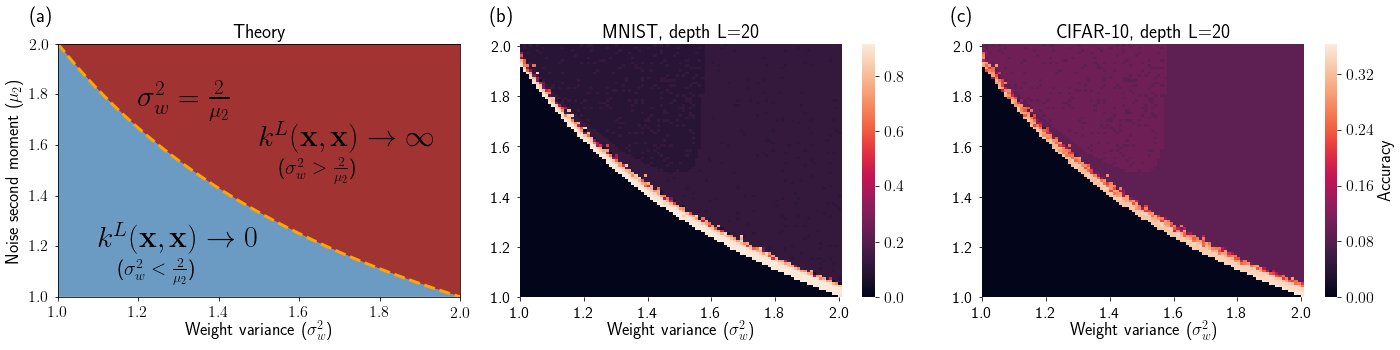

In [2]:
results_mnist = pd.read_csv("results/results20.csv", header=None)
results_cifar = pd.read_csv("results_cifar/results20.csv", header=None)

fig, [ax1, ax2, ax3] = plt.subplots(1, 3, figsize=(20, 5))

# Theory (left)
mu21 = np.linspace(1, 2, 100)
sigma1 = 2/mu21
ax1.plot(mu21, sigma1, c="orange", label="Variance critical boundary", linestyle='--', linewidth=3)
ax1.fill_between(mu21, 1, sigma1, facecolor='steelblue', alpha=0.8)
ax1.fill_between(mu21, 2, sigma1, facecolor='darkred', alpha=0.8)
ax1.text(1.5, 1.6, r'$k^L(\mathbf{x}, \mathbf{x}) \rightarrow \infty$', fontsize=30)
ax1.text(1.55, 1.45, r'($\sigma^2_w > \frac{2}{\mu_2}$)', fontsize=20)
ax1.text(1.1, 1.2, r'$k^L(\mathbf{x}, \mathbf{x}) \rightarrow 0$', fontsize=30)
ax1.text(1.15, 1.05, r'($\sigma^2_w < \frac{2}{\mu_2}$)', fontsize=20)
ax1.text(1.2, 1.7, r'$\sigma^2_w = \frac{2}{\mu_2}$', fontsize=30)
ax1.set_xlim(1, 2)
ax1.set_ylim(1, 2)
ax1.set_xlabel('Weight variance ($\sigma^2_w$)')
ax1.set_ylabel('Noise second moment ($\mu_2$)')
ax1.set_title('Theory')


# MNIST (middle)
sns.heatmap(results_mnist.pivot(4, 2, 7), ax=ax2, rasterized=True)
ax2.invert_yaxis()
ax2.set_title("MNIST, depth L=20")
ax2.set_xlabel(r"Weight variance ($\sigma^2_w$)")
ax2.set_ylabel("")
ax2.set_yticks([],[])
ax2.set_xticks([],[])
ax2.set_yticks(np.linspace(0, 100, 6))
ax2.set_yticklabels(['1.0', '1.2', '1.4', '1.6', '1.8', '2.0'], rotation='horizontal') 
ax2.set_xticks(np.linspace(0, 100, 6))
ax2.set_xticklabels(['1.0', '1.2', '1.4', '1.6', '1.8', '2.0'], rotation='horizontal')

# cifar-10 (right)
sns.heatmap(results_cifar.pivot(4, 2, 7), cbar_kws={'label':"Accuracy"}, ax=ax3, rasterized=True)
ax3.invert_yaxis()
ax3.set_title("CIFAR-10, depth L=20")
ax3.set_xlabel(r"Weight variance ($\sigma^2_w$)")
ax3.set_ylabel('')
ax3.set_yticks([],[])
ax3.set_xticks([],[])
ax3.set_yticks(np.linspace(0, 100, 6))
ax3.set_yticklabels(['1.0', '1.2', '1.4', '1.6', '1.8', '2.0'], rotation='horizontal') 
ax3.set_xticks(np.linspace(0, 100, 6))
ax3.set_xticklabels(['1.0', '1.2', '1.4', '1.6', '1.8', '2.0'], rotation='horizontal') 

fig.text(0.03, 0.95, "(a)", fontsize=20)
fig.text(0.35, 0.95, "(b)", fontsize=20)
fig.text(0.67, 0.95, "(c)", fontsize=20)

plt.gcf().tight_layout()
plt.show()